### Linear Regression from scratch (on Truck Dataset)

### Jay Bhanushali

### 60009200047

### K2 Batch

In [1]:
import numpy as np
import pandas as pd

In [52]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns
plt.rcParams['figure.figsize'] = (10,8)

In [5]:
df = pd.read_csv("food_truck_data.csv")
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Let Population be X (training feature) & Profit (to be predicted) be the y 

In [7]:
X = df.Population
y = df.Profit

Take a look at the data

Text(0.5, 1.0, 'Scatter plot: Population v/s Profit')

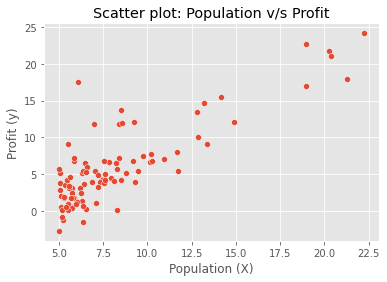

In [42]:
ax = sns.scatterplot(x = "Population", y="Profit", data=df)
ax.set_xlabel("Population (X)")
ax.set_ylabel("Profit (y)")
ax.set_title("Scatter plot: Population v/s Profit")

L(theta) = theta_0 + theta_1 * X

m = no of training examples

X = input = population

y = output = profit

J(theta) = cost func


2x1 matrix of theta :

    theta[0] = 0 (representing theta_0)
    
    theta[1] = 0 (representing theta_1)

    in L(theta) = theta_0 + theta_1 * X

In [33]:
theta = np.zeros((2, 1))

In [34]:
def cost_func(X, y, theta):
    m = len(X)
    y_pred = X*theta[1] + theta[0]
    sse = (y_pred-y)**2 # sum of squared error
    J = (1/(2*m)) * np.sum( sse )
    return [J, y_pred]

In [35]:
print(cost_func(X, y, theta)[0])

32.072733877455676


In [36]:
def grad_desc(X, y, theta, alpha, no_of_iter):
    m = len(X)
    costs=[] # cost in each iteration
    dJ_dtheta = np.zeros((2,1)) # derivative of cost func WRT theta
    for i in range(0, no_of_iter):
        J, y_pred = cost_func(X, y, theta)
        costs.append(J)
        dJ_dtheta[1] = (1/m) * np.sum((y_pred - y)*X )
        dJ_dtheta[0] = (1/m) * np.sum( (y_pred - y) )
        theta = theta - alpha*dJ_dtheta
        # The following computation is stored in respective positions
        # theta[1] = theta[1] - alpha*dJ_dtheta[1]
        # theta[0] = theta[0] - alpha*dJ_dtheta[0]
        
    return [theta, costs ]

In [40]:
theta, costs = grad_desc(X, y, theta , 0.01, 2000)
print(f"L(x) = {theta[0]} + {theta[1]}X ")


L(x) = [-3.89571485] + [1.19302701]X 


C:\Users\Jay\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


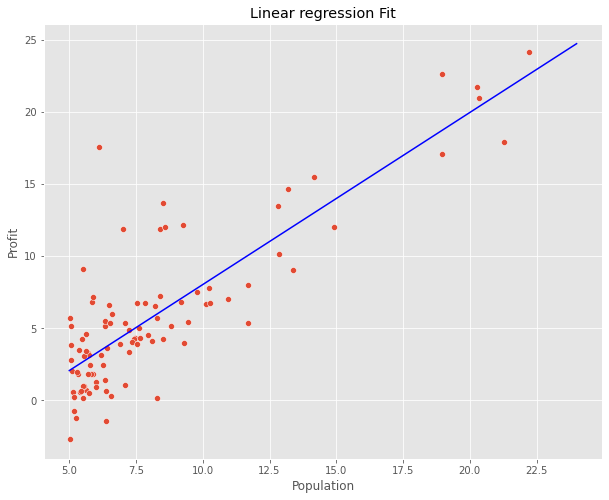

In [53]:
# scatter plot
ax = sns.scatterplot(x = "Population", y="Profit", data=df)
ax.set_title("Scatter plot: Population v/s Profit")

# Line
theta = np.squeeze(theta)
x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value, color = "blue")

plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Linear regression Fit");